In [550]:
#Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import pickle

In [4]:
#Load the data
df=pd.read_csv('heart.csv')


In [5]:
#data head
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#data tail
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
#data dimensions
df.shape

(303, 14)

In [8]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#checking for missing values
df.isnull().sum()

#No any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
#checking for duplicates
df.duplicated().sum()


1

In [11]:
#removing duplicates
df.drop_duplicates(inplace = True)

In [12]:
#Data analysis
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Data columns
col=df.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

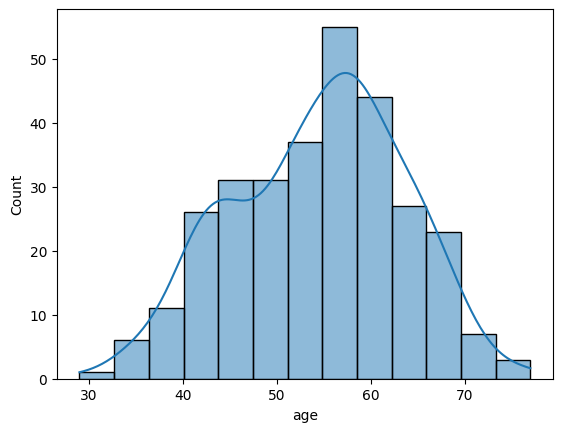

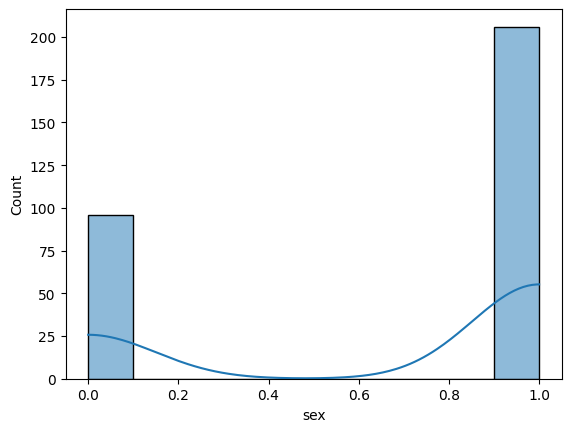

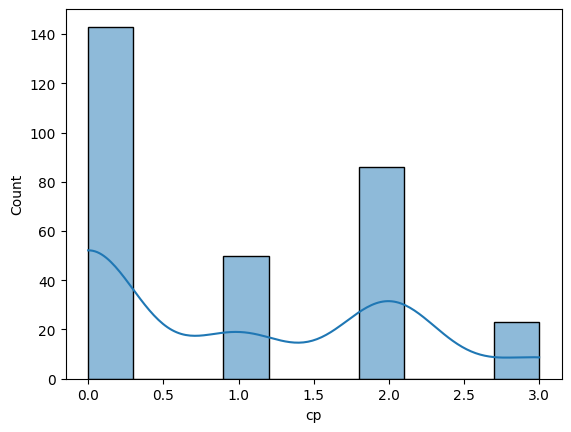

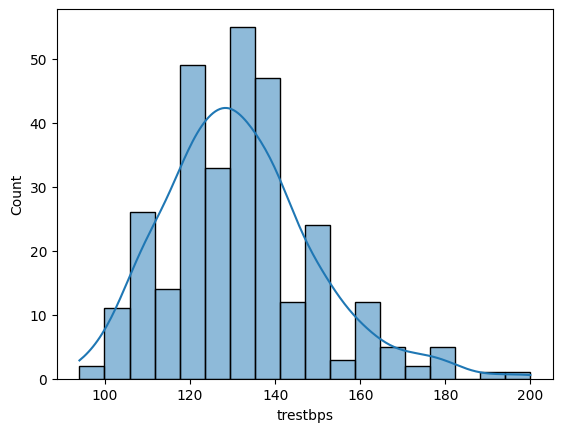

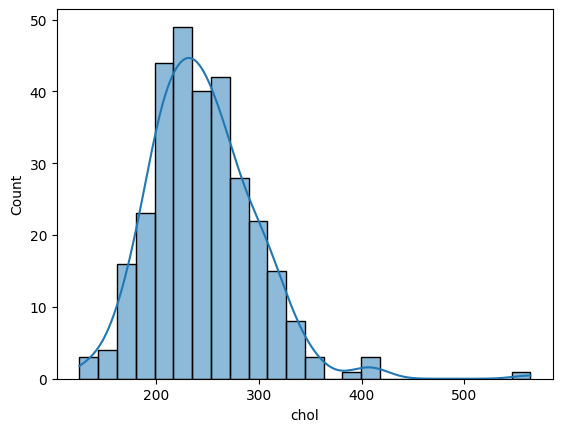

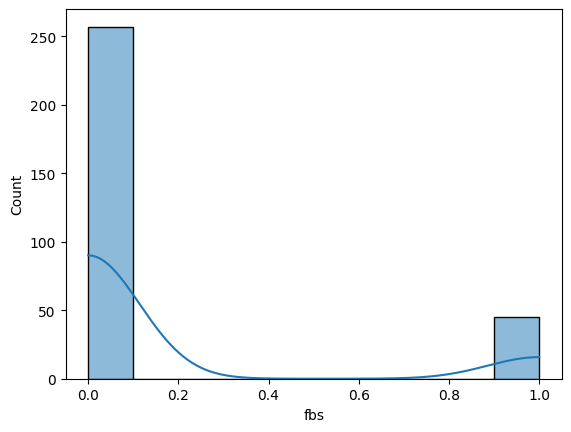

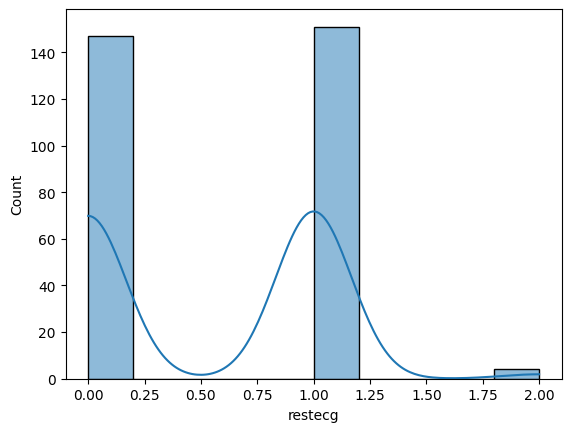

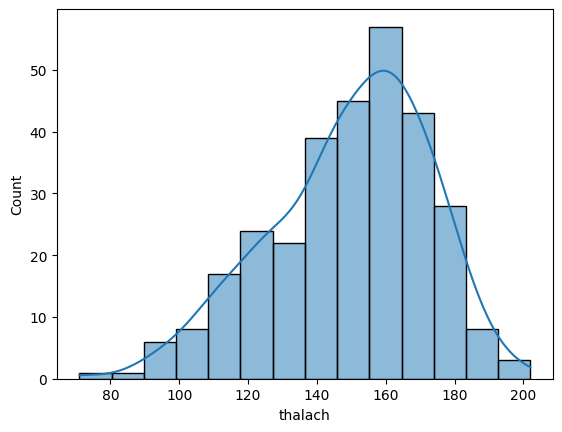

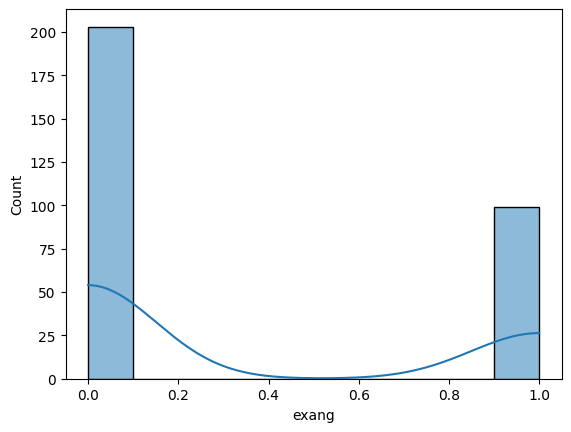

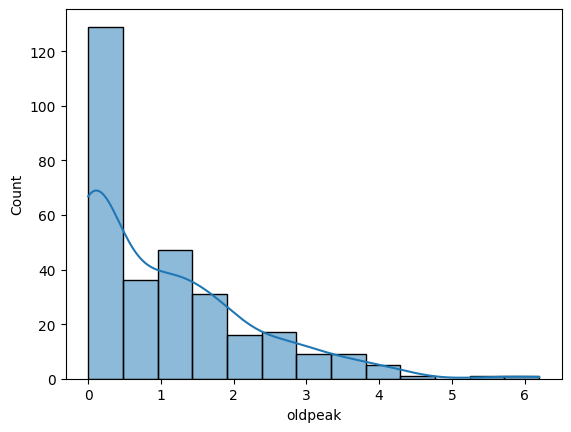

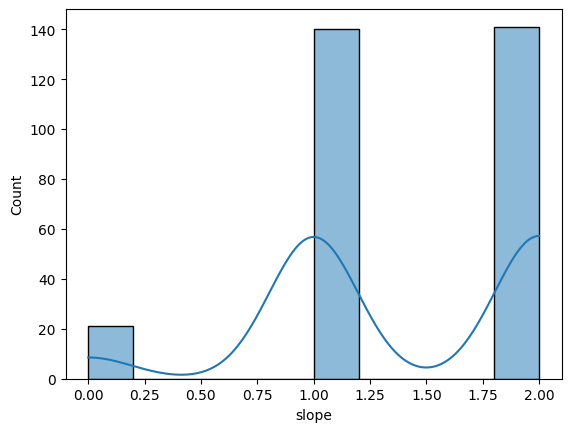

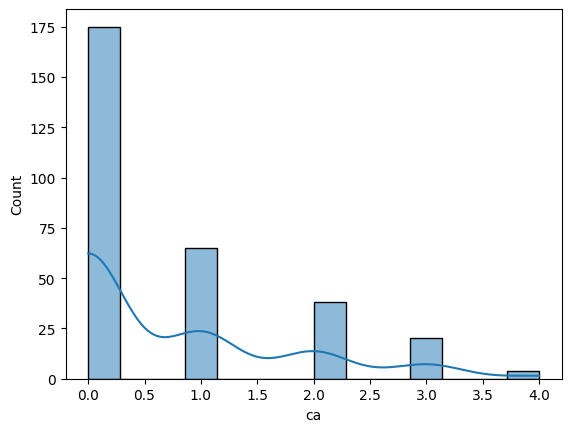

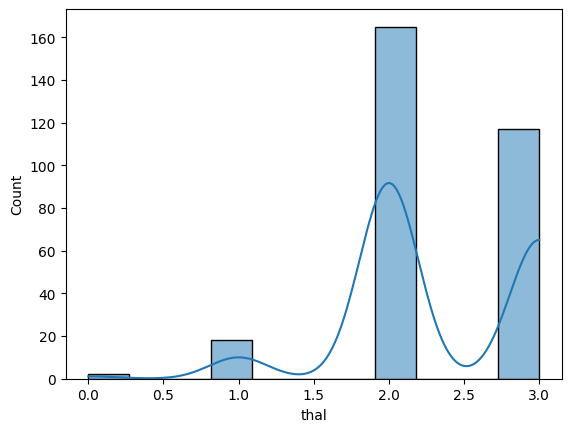

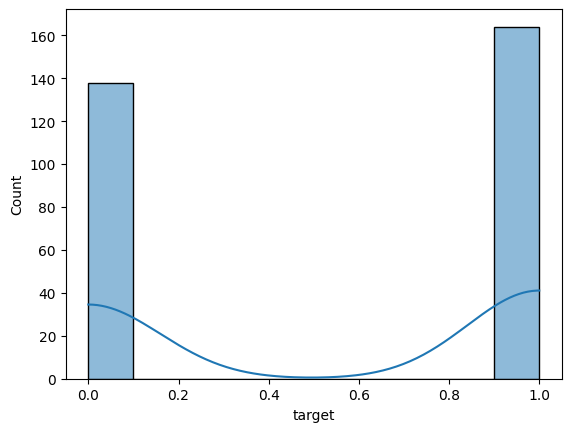

In [14]:
#Understanding the distribution through histograms
for i in col:
    sns.histplot(data = df,x=i,kde=True)
    plt.show()

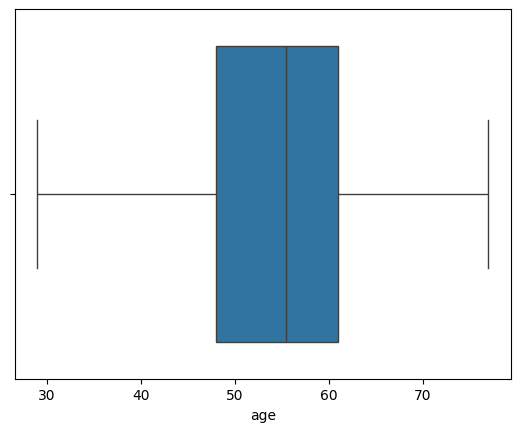

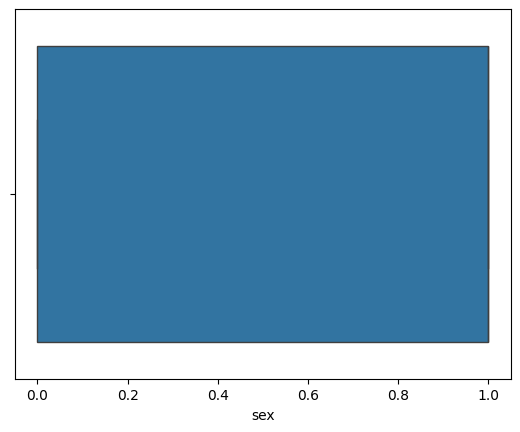

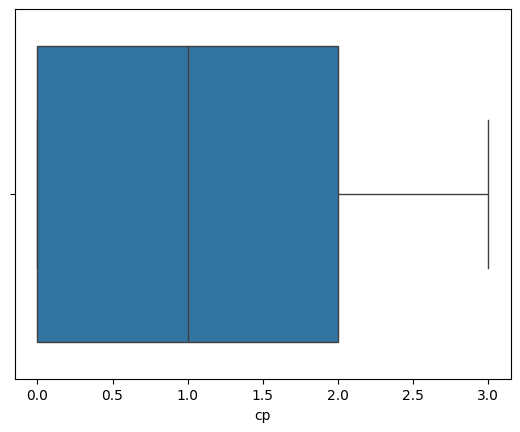

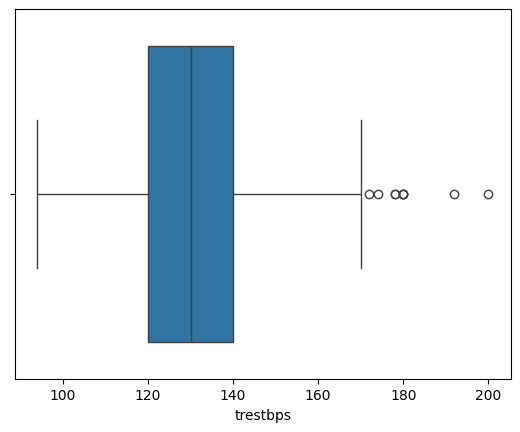

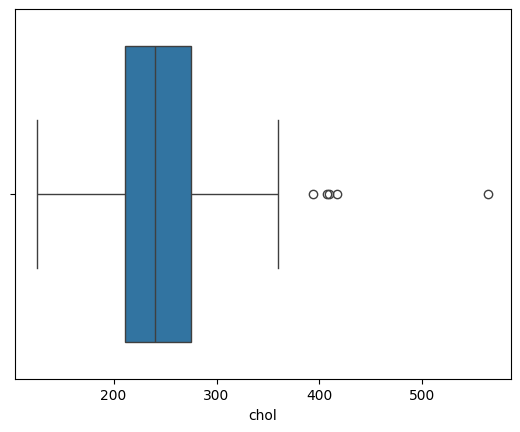

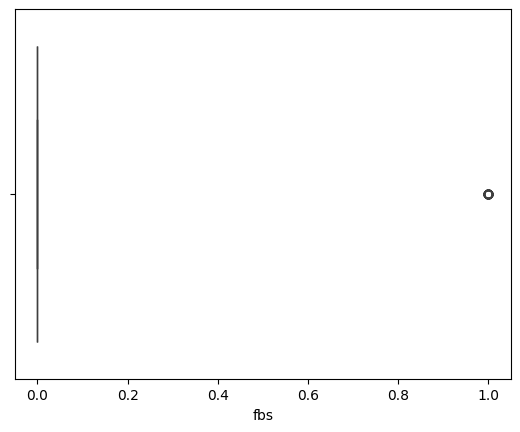

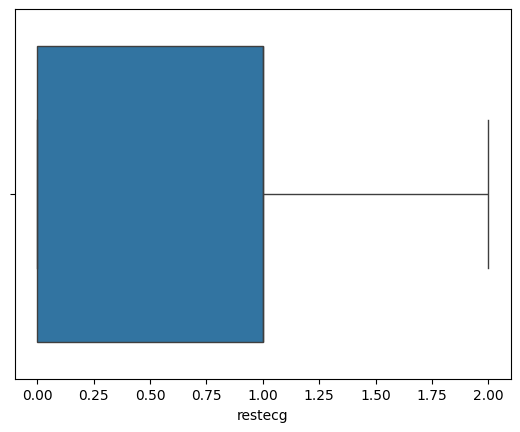

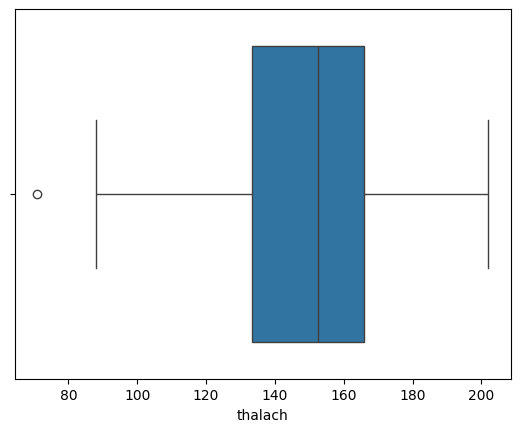

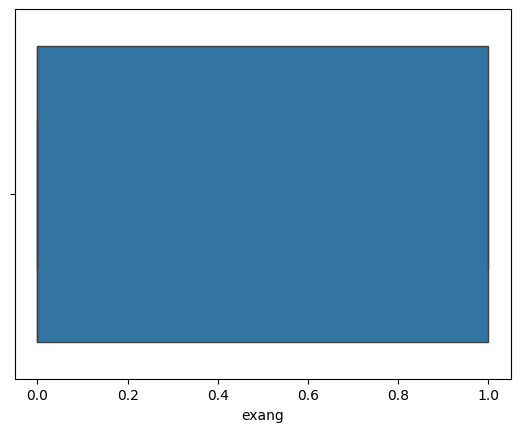

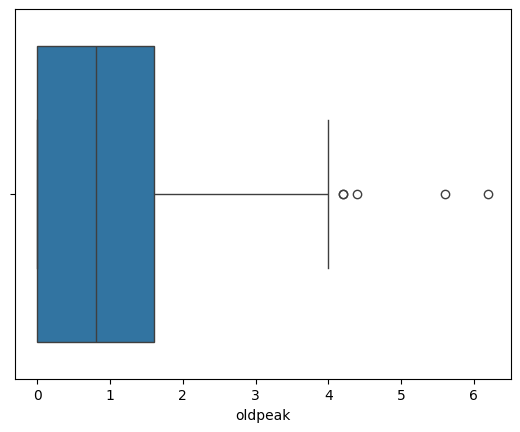

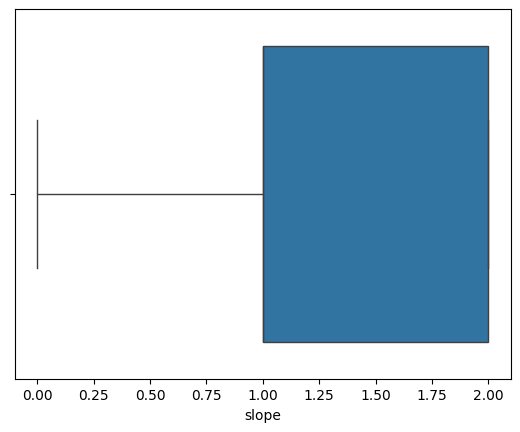

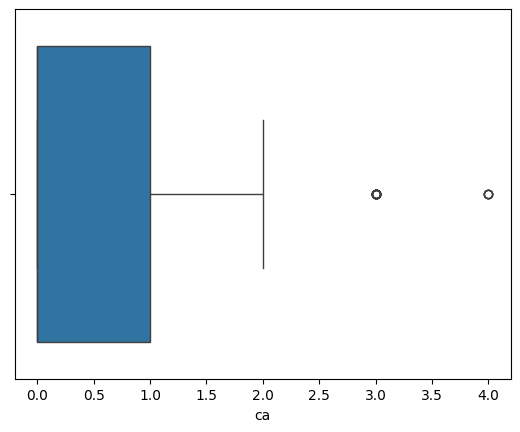

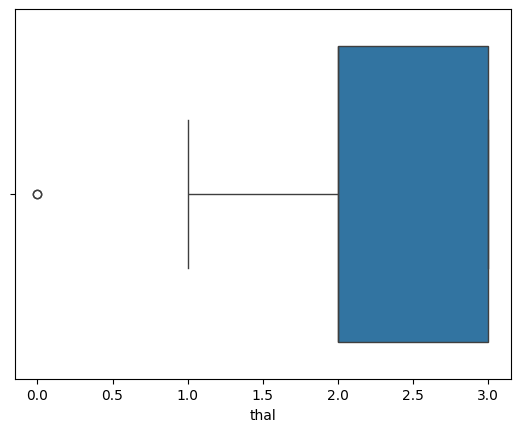

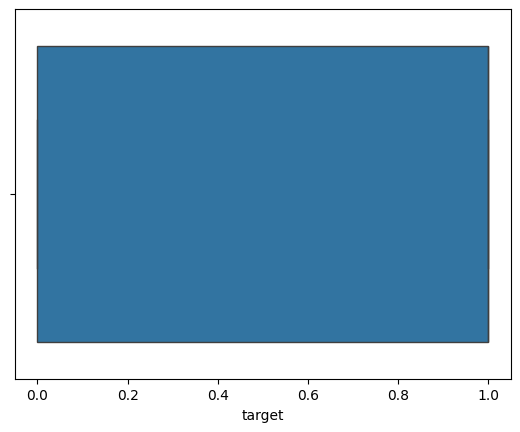

In [15]:
#Understanding the outliers through boxplot
for i in col:
    sns.boxplot(data = df,x=i)
    plt.show()

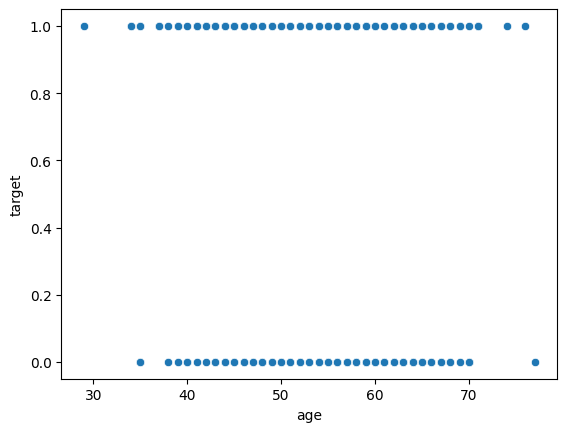

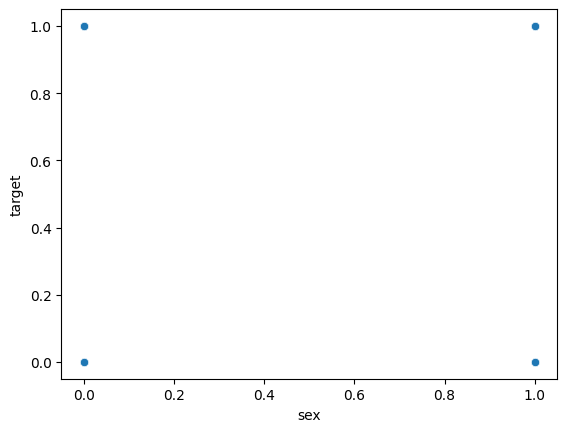

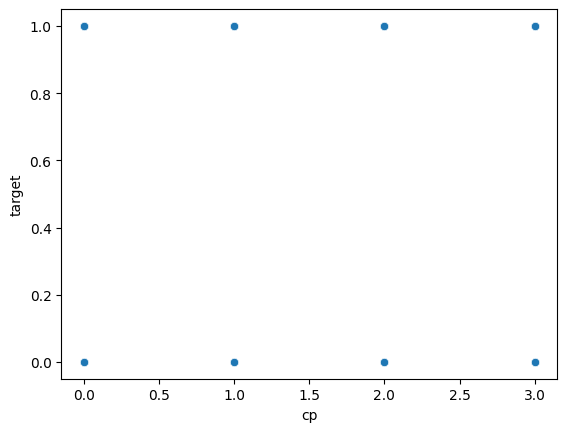

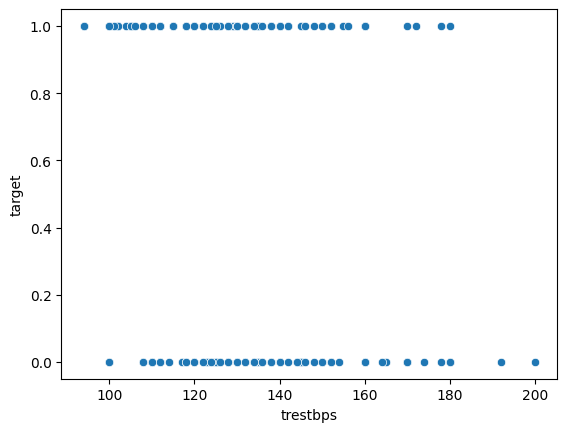

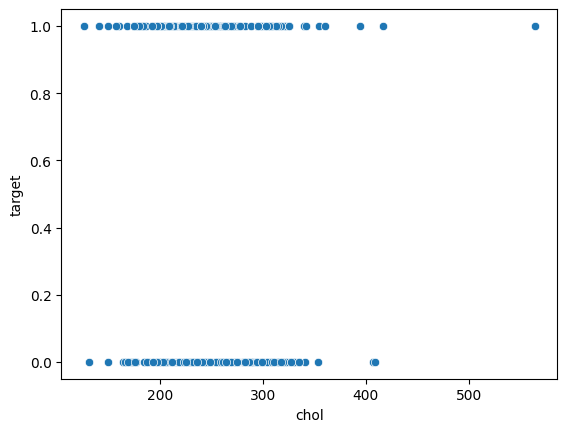

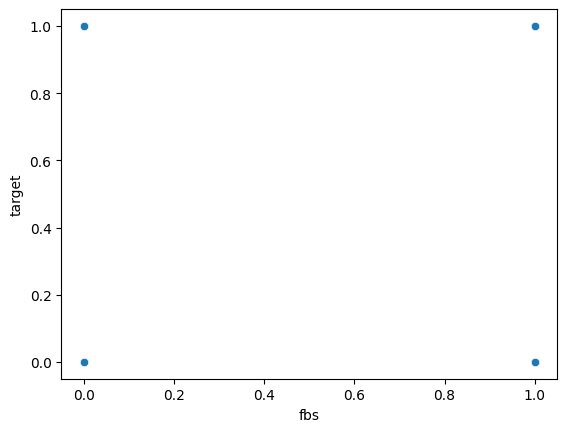

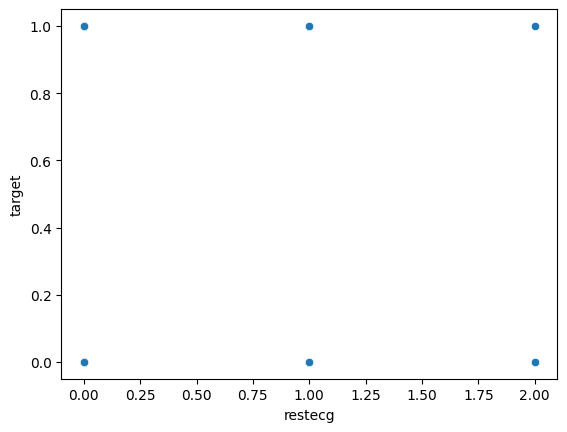

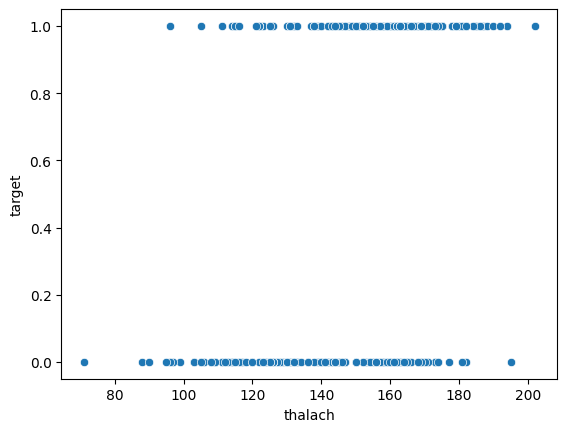

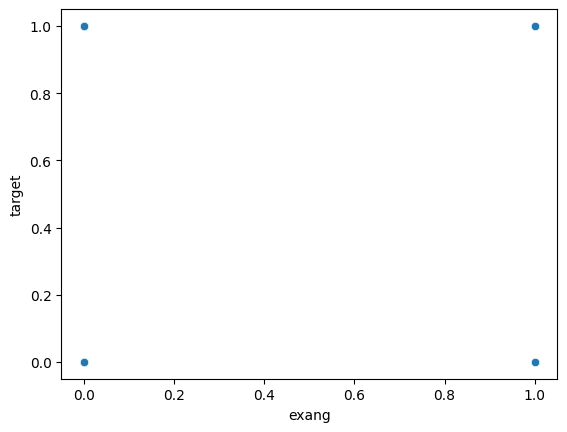

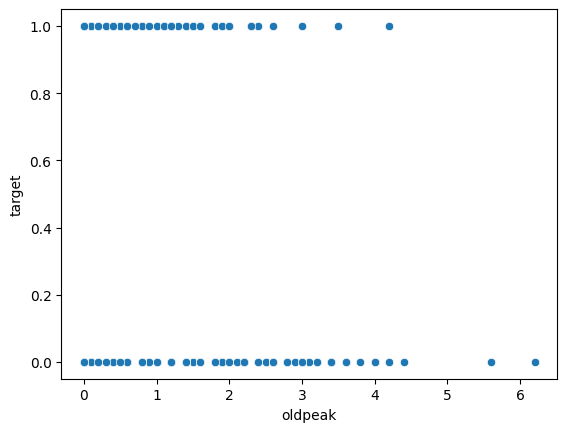

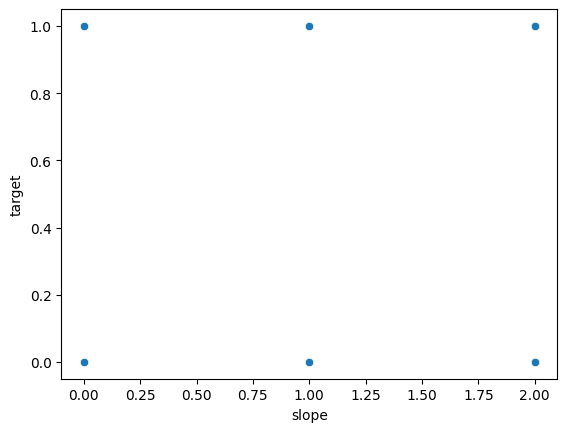

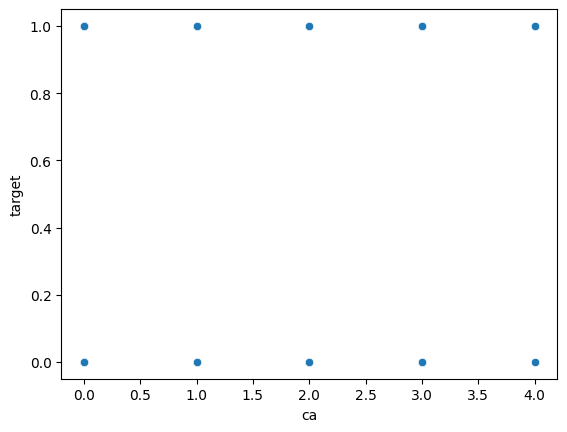

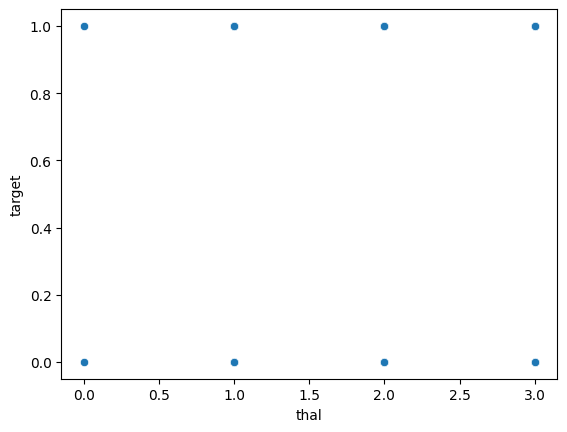

In [16]:
#understanding the relationship between the features and the target variable

for i in ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']:
    sns.scatterplot(data = df,x=i,y='target')
    plt.show()

In [30]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.020000e+02,302.000000,302.000000,3.020000e+02,3.020000e+02,302.000000,302.000000,3.020000e+02,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,-2.588070e-16,0.682119,0.963576,4.352662e-16,-1.235215e-16,0.149007,0.526490,-3.764465e-16,0.327815,0.256954,1.397351,0.718543,2.314570,0.543046
std,1.001660e+00,0.466426,1.032044,1.001660e+00,1.001660e+00,0.356686,0.526027,1.001660e+00,0.470196,0.277599,0.616274,1.006748,0.613026,0.498970
min,-2.814192e+00,0.000000,0.000000,-2.247491e+00,-2.518079e+00,0.000000,0.000000,-2.881347e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.107878e-01,0.000000,0.000000,-6.791211e-01,-7.251323e-01,0.000000,0.000000,-7.199406e-01,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.195033e-01,1.000000,1.000000,-7.590177e-02,-1.028744e-01,0.000000,1.000000,1.270226e-01,0.000000,0.200000,1.000000,0.000000,2.000000,1.000000
75%,7.283833e-01,1.000000,2.000000,5.273176e-01,6.195775e-01,0.000000,1.000000,7.209968e-01,1.000000,0.400000,2.000000,1.000000,3.000000,1.000000
max,2.499671e+00,1.000000,3.000000,2.336976e+00,2.636642e+00,1.000000,2.000000,2.304928e+00,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


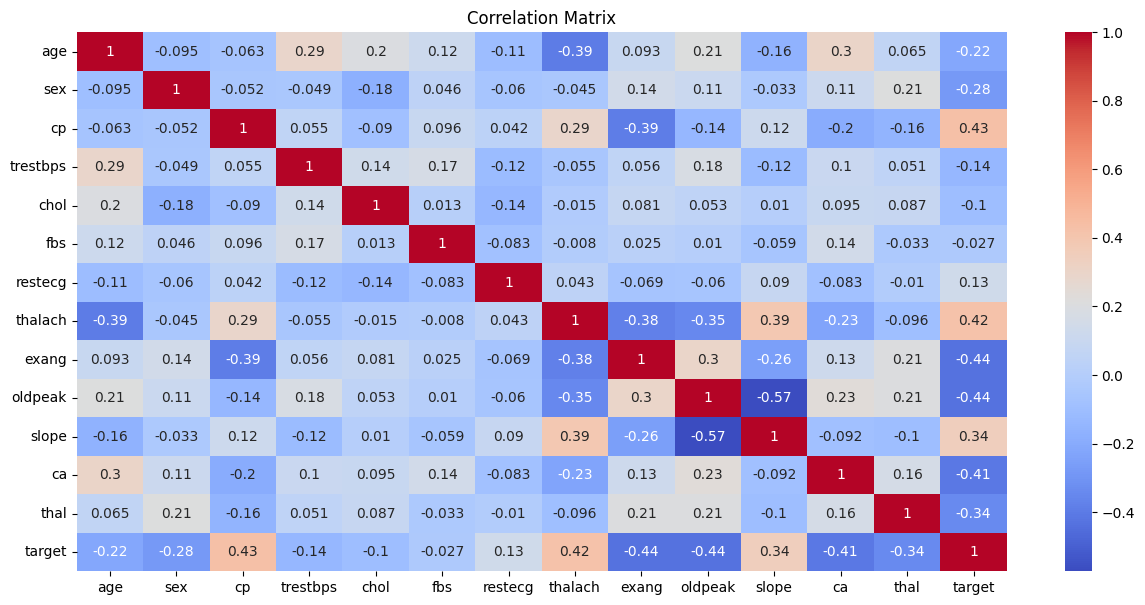

In [27]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [18]:
#Getting the upper bound and the lower bound of the wisker
def whisker(col):
    q1=np.percentile(df[col],25)
    q3=np.percentile(df[col],75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    return lower,upper

In [19]:
#Fixing Outliers for these Columns
for i in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    lower,upper=whisker(i)
    df[i]=np.where(df[i]>upper,upper,df[i])
    df[i]=np.where(df[i]<lower,lower,df[i])

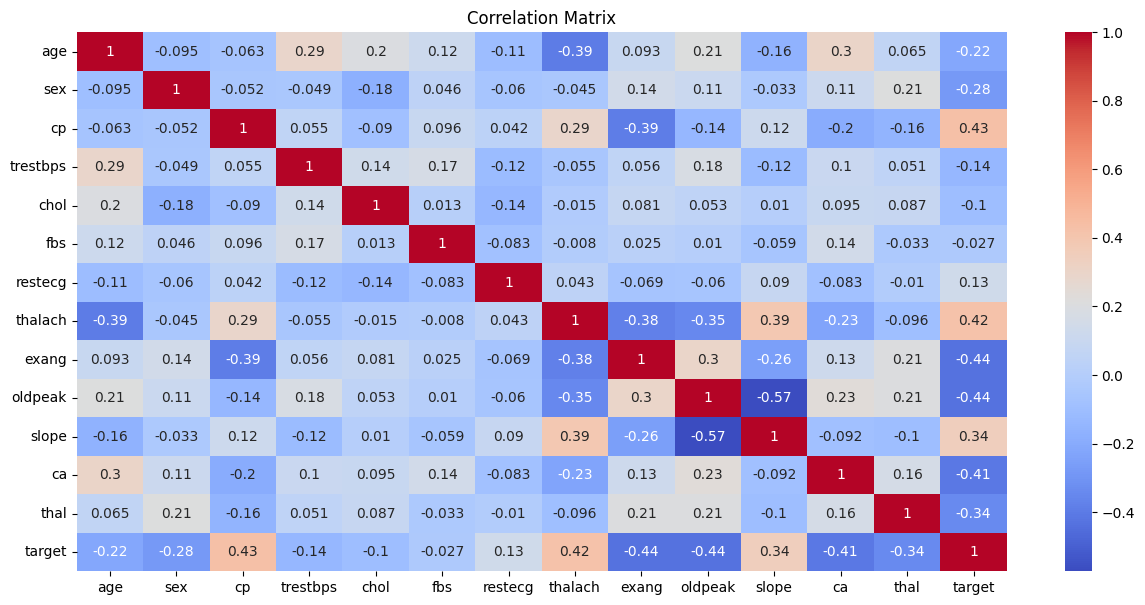

In [31]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

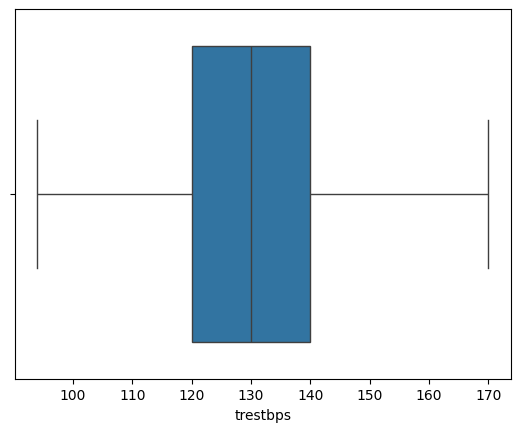

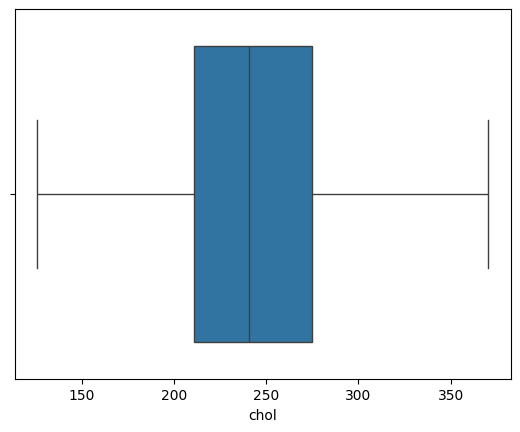

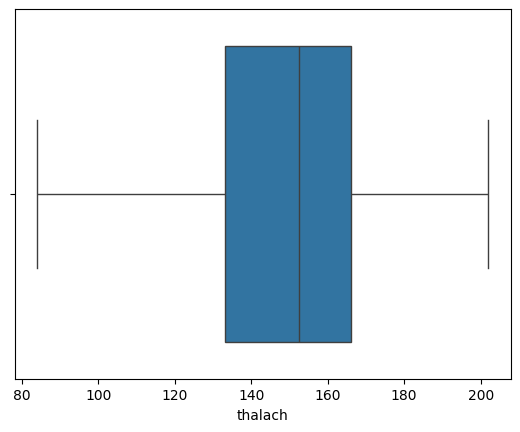

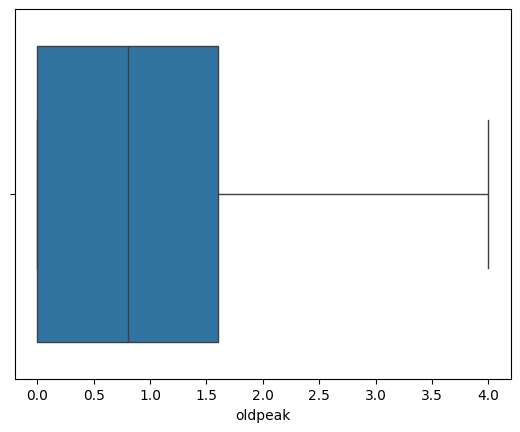

In [20]:
#Checking for Outliers
for i in ['trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.boxplot(data = df,x=i)
    plt.show()

Normalizing the attributes that have a wide range than user attributes like (age,chol,trestbps,thalach,oldpeak)

In [21]:
#Normailze Age,Oldpeak as they are not gaussian distribution using minmax scaler

scaler = MinMaxScaler()
df[['oldpeak']] = scaler.fit_transform(df[['oldpeak']])

In [22]:
#Normalize trestbps, chol, thalach as they are gaussian distribution using standard scaler

scaler = StandardScaler()
df[['thalach', 'trestbps', 'chol','age']] = scaler.fit_transform(df[['thalach', 'trestbps', 'chol','age']])

In [34]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Running the 2 models without any hyperparamters or any feature selections

In [272]:
# Spliting the data
X = df.drop(["target"], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=True
)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((46, 13), (256, 13), (46,), (256,))

In [554]:
# Train Logistic Regression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('F1 Score: ',f1_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8260869565217391
F1 Score:  0.8461538461538461


In [555]:
# Train Random Forest
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('F1 Score: ',f1_score(y_test, y_pred_log_reg))


Random Forest Accuracy: 0.8478260869565217
F1 Score:  0.8461538461538461


Feature Selection Process using the Varience threshold and dropping attributes that are less than 0.2

In [562]:
#Feature selection using Variance Threshold
X_train_V1, X_test_V1, y_train_V1, y_test_V1 = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

X_train_V1.var(axis=0)

#set the threshold to 0.2
# so will try running the model again after dropping (fbs,oldpeak)

age         1.010885
sex         0.225230
cp          1.061994
trestbps    1.001479
chol        1.028074
fbs         0.121324
restecg     0.281602
thalach     0.963004
exang       0.214200
oldpeak     0.075359
slope       0.367647
ca          0.993873
thal        0.380392
dtype: float64

In [563]:
# After dropping the colums with variance less than 0.2

X_train_Selected_V1=X_train_V1.drop(['fbs','oldpeak'],axis=1)
X_test_Selected_V1=X_test_V1.drop(['fbs','oldpeak'],axis=1)

#using 11 attributes rather than 13 so it is much better 


Running the Models After the Feature Selection process

In [564]:

log_reg.fit(X_train_Selected_V1, y_train)
y_pred_log_reg = log_reg.predict(X_test_Selected_V1)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log_reg))    
print('F1 Score:', f1_score(y_test_V1, y_pred_log_reg))


Logistic Regression Accuracy: 0.782608695652174
F1 Score: 0.8


In [566]:
rf.fit(X_train_Selected_V1, y_train)
y_pred_rf2= rf.predict(X_test_Selected_V1)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf2))
print('F1 Score:', f1_score(y_test_V1, y_pred_rf2))


Random Forest Accuracy: 0.8695652173913043
F1 Score: 0.8888888888888888


After Feature Selection and Running the Logistic Regression using C=0.01

In [567]:
Logi_reg = LogisticRegression(C=0.01)
Logi_reg.fit(X_train_Selected_V1, y_train)
y_Logi_reg_pred = Logi_reg.predict(X_test_Selected_V1)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_Logi_reg_pred))    
print('F1 Score:', f1_score(y_test_V1, y_Logi_reg_pred))

Logistic Regression Accuracy: 0.9130434782608695
F1 Score: 0.9259259259259259


Using the GridSearchCV to find the best combinations of hyperParamters to fine tune the Random Forest Model

In [540]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = [ 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [541]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [560]:
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3)

In [551]:
rf_Grid.fit(X_train_Selected_V1, y_train_V1)

Fitting 3 folds for each of 3960 candidates, totalling 11880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [552]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 70}

In [553]:
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf2))
print('F1 Score:', f1_score(y_test_V1, y_pred_rf2))

Random Forest Accuracy: 0.8695652173913043
F1 Score: 0.8888888888888888
